<a href="https://colab.research.google.com/github/codeMaverick7770/Student-Performance-Predictor/blob/main/Copy_of_Student_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Student_Performance_Dataset.csv')

In [ ]:
df.shape

(10000, 6)

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.isnull().sum() #Dropping not required here

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
o = df.dtypes == "int64"
i = o[o].index
i

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

<Axes: >

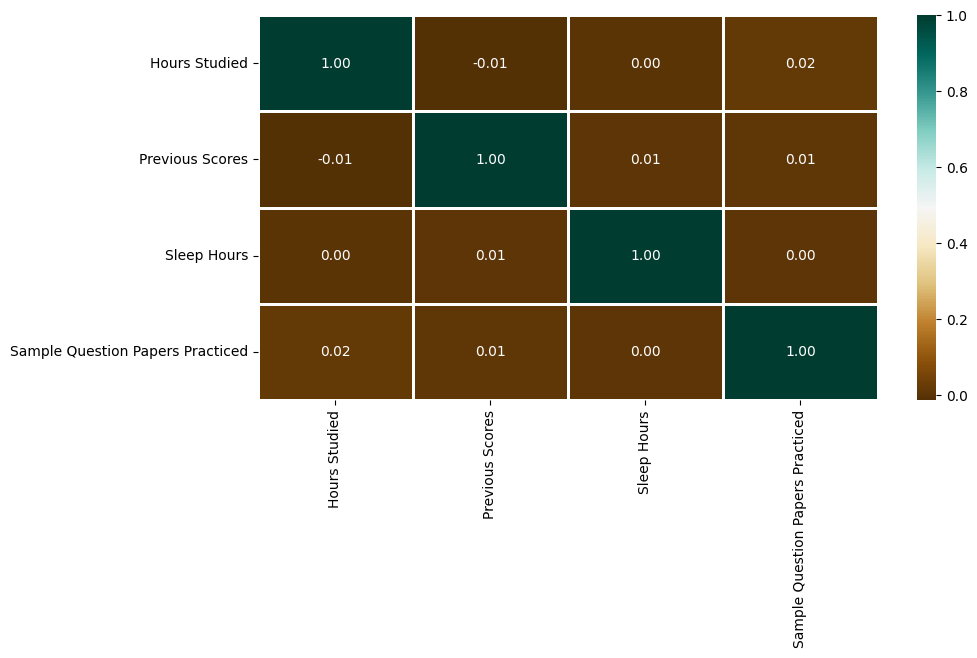

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df[i].corr(),cmap = 'BrBG',fmt = '.2f',linewidths=2,annot=True)

In [ ]:
df_copy = df.copy()

In [ ]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
ExtraAct = pd.get_dummies(df[['Extracurricular Activities']],drop_first=True)

In [ ]:
ExtraAct

,Extracurricular Activities_Yes
0,True
1,False
2,True
3,True
4,False
...,...
9995,True
9996,True
9997,True
9998,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df_main.info()

NameError: name 'df_main' is not defined

In [ ]:
df.drop(['Extracurricular Activities'], inplace = True, axis = 1)

In [ ]:
df_main = pd.concat([df,ExtraAct],axis= 1)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


In [ ]:
df_main

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,True
9996,7,64,8,5,58.0,True
9997,6,83,8,5,74.0,True
9998,9,97,7,0,95.0,True


In [ ]:
X = df_main.drop(['Performance Index'],axis =1)
Y = df_main[['Performance Index']]

In [ ]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,True
1,4,82,4,2,False
2,8,51,7,2,True
3,5,52,5,2,True
4,7,75,8,5,False
...,...,...,...,...,...
9995,1,49,4,2,True
9996,7,64,8,5,True
9997,6,83,8,5,True
9998,9,97,7,0,True


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=0.80,random_state=42)

In [ ]:
x_train.shape

(2000, 5)

In [ ]:
y_train.shape

(2000, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_train,y_train)

0.9888680836042563

In [ ]:
y_pred = model.predict(x_val)

In [ ]:
x_val

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
6252,5,69,8,2,False
4684,2,46,4,8,True
1731,7,56,7,5,True
4742,6,42,8,5,True
4521,7,53,4,6,False
...,...,...,...,...,...
1638,2,96,5,5,False
5891,1,66,8,7,False
7427,8,47,7,1,False
608,7,99,5,4,False


In [ ]:
y_pred

array([[54.84798563],
       [22.48926034],
       [47.94945806],
       ...,
       [40.39305763],
       [89.95038913],
       [43.37131441]])

In [ ]:
y_val

,Performance Index
6252,51.0
4684,20.0
1731,46.0
4742,28.0
4521,41.0
...,...
1638,75.0
5891,39.0
7427,36.0
608,90.0
